### Step1: Start by importing the necessary Python libraries for data preprocessing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from scipy import stats
from sklearn.preprocessing import LabelEncoder


### Step 2 Load the placement dataset into a Pandas Dataframe.

In [2]:
data=pd.read_csv("Automobile.csv")


####  Step 3 : Take a quick look at the data to understand its structure and identify any missing values or anomalies.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           386 non-null    float64
 1   cylinders     386 non-null    float64
 2   displacement  383 non-null    float64
 3   weight        386 non-null    float64
 4   acceleration  384 non-null    float64
 5   model_year    386 non-null    int64  
 6   horsepower    386 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 21.2 KB


{'whiskers': [<matplotlib.lines.Line2D at 0x1bbf192c690>,
 'caps': [<matplotlib.lines.Line2D at 0x1bbf192c910>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bbf190c550>],
 'medians': [<matplotlib.lines.Line2D at 0x1bbf192cb90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bbf192ccd0>],
 'means': []}

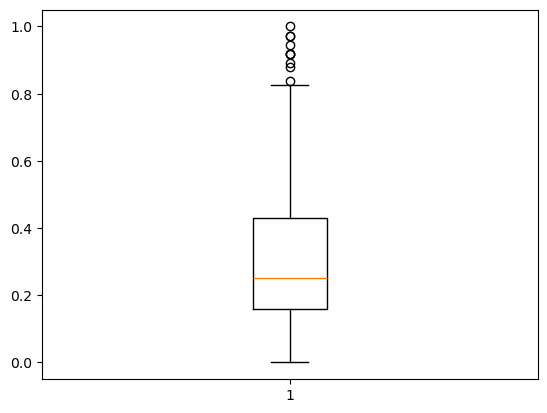

In [3]:

data.info()
plt.boxplot(data["horsepower"])

####Step 4  Option 1: Identifying Outliers Using Z-Scores
The value of 3 in the context of Z-scores is often used as a threshold to identify outliers in a dataset. A Z-score represents how many standard deviations a data point is away from the mean of the dataset. Specifically:

A Z-score of 0 means the data point is exactly at the mean.
A Z-score of 1 means the data point is one standard deviation above the mean, and so on.
A Z-score of 3 corresponds to a data point being 3 standard deviations away from the mean. For a normal distribution, about 99.7% of the data points fall within 3 standard deviations of the mean (according to the 68-95-99.7 rule, which describes the spread of data in a normal distribution). Therefore, points with Z-scores greater than 3 or less than -3 are considered unusually far from the mean and are often flagged as outliers.

This threshold (Z > 3 or Z < -3) is commonly used in many statistical applications because it captures the extreme values that are rare in a normal distribution, which are typically considered to be outliers. However, the choice of threshold can vary depending on the specific application and the nature of the data.



In [14]:
colums_to_check = ["horsepower"]
z_scores = stats.zscore(data[colums_to_check])
print(z_scores)
threshold = 3
outlier_indices_u = (z_scores > threshold).any(axis=1)
outlier_indices_l = (z_scores > -3).any(axis=1)
print(outlier_indices_u)
clean=data[~outlier_indices_u]
print(len(clean))
clean.info()

[[ 0.67523716]
 [ 1.59539592]
 [ 1.20104217]
 [ 1.20104217]
 [ 0.93813966]
 [ 2.46297419]
 [ 3.0413597 ]
 [ 2.90990845]
 [ 2.25265218]
 [ 1.72684718]
 [ 1.46394467]
 [ 1.20104217]
 [ 3.17281095]
 [-0.24492161]
 [-0.24492161]
 [-0.19234111]
 [-0.50782411]
 [-0.42895336]
 [-0.45524361]
 [-0.37637286]
 [-0.24492161]
 [ 0.2283029 ]
 [-0.37637286]
 [ 2.90990845]
 [ 2.51555469]
 [ 2.77845719]
 [ 2.33152294]
 [-0.42895336]
 [-0.37637286]
 [-0.24492161]
 [-0.11347036]
 [ 0.0179809 ]
 [-0.11347036]
 [-0.42895336]
 [-0.11347036]
 [ 1.59539592]
 [ 1.85829843]
 [ 1.27991292]
 [ 1.20104217]
 [ 1.98974968]
 [ 1.72684718]
 [ 1.85829843]
 [ 0.14943215]
 [-0.84959737]
 [-0.11347036]
 [-0.42895336]
 [-0.48153386]
 [-0.37637286]
 [-0.90217787]
 [-0.74443637]
 [-1.03362912]
 [-0.92846812]
 [-1.16508037]
 [-0.90217787]
 [-0.24492161]
 [-0.63927536]
 [-1.32282188]
 [-0.37637286]
 [-0.48153386]
 [ 1.59539592]
 [ 1.85829843]
 [ 1.20104217]
 [ 1.27991292]
 [ 1.20104217]
 [ 2.72587669]
 [ 1.33249342]
 [ 1.46394

In [12]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382 entries, 0 to 385
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           382 non-null    float64
 1   cylinders     382 non-null    float64
 2   displacement  379 non-null    float64
 3   weight        382 non-null    float64
 4   acceleration  380 non-null    float64
 5   model_year    382 non-null    int64  
 6   horsepower    382 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 23.9 KB


#### Option 2:  Capping and Flooring Outliers

In [6]:

lower_limit=data[columns_to_check].quantile(0.05)
upper_limit=data[columns_to_check].quantile(0.95)
df_capped=data.copy()
df_capped[columns_to_check]=df_capped[columns_to_check].clip(lower_limit,upper_limit,axis=1)

### Step 5: Convert categorical variables into numerical format using LabelEncoder ().

In [8]:

L1=LabelEncoder()
data["cylinders"]=L1.fit_transform(data["cylinders"])
data["displacement"]=L1.fit_transform(data["displacement"])
data["weight"]=L1.fit_transform(data["weight"])
data["acceleration"]=L1.fit_transform(data["acceleration"])
data.head()

,mpg,cylinders,displacement,weight,acceleration,model_year,horsepower
0,18.0,4,68,239,13,70,0.456522
1,15.0,4,71,257,11,70,0.646739
2,18.0,4,69,233,6,70,0.565217
3,16.0,4,66,232,13,70,0.565217
4,17.0,5,65,236,5,70,0.510870


In [10]:
data=pd.read_csv("Automobile.csv")
categorical_cols=['cylinders','displacement','weight','acceleration']
one_hot_encoded_data=pd.get_dummies(
    data,
    columns=categorical_cols,
)
print(one_hot_encoded_data)
one_hot_encoded_data.to_csv("Final.csv")

      mpg  model_year  horsepower  cylinders_0.0  \
0    18.0          70    0.456522          False   
1    15.0          70    0.646739          False   
2    18.0          70    0.565217          False   
3    16.0          70    0.565217          False   
4    17.0          70    0.510870          False   
..    ...         ...         ...            ...   
381  27.0          82    0.217391          False   
382  44.0          82    0.032609          False   
383  32.0          82    0.206522          False   
384  28.0          82    0.179348          False   
385  31.0          82    0.195652          False   

     cylinders_0.0052419437620184  cylinders_0.0104838875240369  \
0                           False                         False   
1                           False                         False   
2                           False                         False   
3                           False                         False   
4                           False       